In [1]:
import utils
import numpy as np
import matplotlib.pyplot as plt
import params
import data_loader

In [2]:
x_train, y_train, x_test, y_test = data_loader.get_train_test()

Load .edf -> .\data\PSGData1_Hang7\20190917-T3-93135.edf
Extracting EDF parameters from E:\ZJU_Research\SR_ZJUPH_PSG\data\PSGData1_Hang7\20190917-T3-93135.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...


E:\ZJU_Research\SR_ZJUPH_PSG\utils.py:27: RuntimeWarning: Physical range is not defined in following channels:
Thor, Abdo
  raw_train = mne.io.read_raw_edf(path)


1186 36441088
Normalizing ... Current Dimension -> 0
Normalizing ... Current Dimension -> 1
Normalizing ... Current Dimension -> 2
Normalizing ... Current Dimension -> 3
Normalizing ... Current Dimension -> 4
Normalizing ... Current Dimension -> 5
Normalizing ... Current Dimension -> 6
Normalizing ... Current Dimension -> 7
Normalizing ... Current Dimension -> 8
Normalizing ... Current Dimension -> 9
Normalizing ... Current Dimension -> 10
Normalizing ... Current Dimension -> 11
Normalizing ... Current Dimension -> 12
Normalizing ... Current Dimension -> 13
Normalizing ... Current Dimension -> 14
Normalizing ... Current Dimension -> 15
Normalizing ... Current Dimension -> 16
Normalizing ... Current Dimension -> 17
Normalizing ... Current Dimension -> 18
Normalizing ... Current Dimension -> 19
Normalizing ... Current Dimension -> 20
Return data, np.std(data) is too Low! len data -> 36441088
Normalizing ... Current Dimension -> 21
Normalizing ... Current Dimension -> 22
Return data, np.s

E:\ZJU_Research\SR_ZJUPH_PSG\utils.py:27: RuntimeWarning: Physical range is not defined in following channels:
Thor, Abdo
  raw_train = mne.io.read_raw_edf(path)


1168 35885056
Normalizing ... Current Dimension -> 0
Normalizing ... Current Dimension -> 1
Normalizing ... Current Dimension -> 2
Normalizing ... Current Dimension -> 3
Normalizing ... Current Dimension -> 4
Normalizing ... Current Dimension -> 5
Normalizing ... Current Dimension -> 6
Normalizing ... Current Dimension -> 7
Normalizing ... Current Dimension -> 8
Normalizing ... Current Dimension -> 9
Normalizing ... Current Dimension -> 10
Normalizing ... Current Dimension -> 11
Normalizing ... Current Dimension -> 12
Normalizing ... Current Dimension -> 13
Normalizing ... Current Dimension -> 14
Normalizing ... Current Dimension -> 15
Normalizing ... Current Dimension -> 16
Normalizing ... Current Dimension -> 17
Normalizing ... Current Dimension -> 18
Normalizing ... Current Dimension -> 19
Normalizing ... Current Dimension -> 20
Normalizing ... Current Dimension -> 21
Normalizing ... Current Dimension -> 22
Normalization Done!
Generating Train&Test ... Current Index -> 0
Generating 

In [3]:
!pip install visualkeras

In [32]:
!conda install -c conda-forge ann -y
!conda install -c conda-forge ann_visualizer -y
!conda install graphviz -y
!conda install -c anaconda python-graphviz -y
!conda install -c anaconda pydot -y


CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://repo.anaconda.com/pkgs/main/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.

If your current network has https://www.anaconda.com blocked, please file
a support request with your network engineering team.

'https://repo.anaconda.com/pkgs/main/win-64'





CondaHTTPError: HTTP 000 CONNECTION FAILED for url <https://repo.anaconda.com/pkgs/main/win-64/current_repodata.json>
Elapsed: -

An HTTP error occurred when trying to retrieve this URL.
HTTP errors are often intermittent, and a simple retry will get you on your way.

If your current network has https://www.anaconda.com blocked, please file
a support request with your network engineering team.

'https://repo.anaconda.com/pkgs/main/win-64'




^C
Solving environment: ...working... done

# All requested packages already installed.

Solving environment: ...working... done

## Package Plan ##

  environment location: D:\Miniconda3\envs\tf

  added / updated specs:
    - python-graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.4.26  |       haa95532_0         163 KB  anaconda
    certifi-2021.10.8          |   py39haa95532_2         156 KB  anaconda
    python-graphviz-0.16       |     pyhd3eb1b0_1          20 KB  anaconda
    ------------------------------------------------------------
                                           Total:         339 KB

The following NEW packages will be INSTALLED:

  python-graphviz    anaconda/noarch::python-graphviz-0.16-pyhd3eb1b0_1

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates                                 pkgs/main -

In [38]:
from models import cnn_1, cnn_2, cnn_lstm, cnn_crf, resnet_101v2, efficient_net_v2l, vgg_19
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import f1_score, accuracy_score, classification_report
from glob import glob
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
from ann_visualizer.visualize import ann_viz
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import TensorBoard
import tensorboard
import datetime
from tensorflow.keras.utils import plot_model
import visualkeras

In [23]:
MODEL_LIST = []

In [24]:
MODEL_LIST.append(cnn_1())

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 30726, 23)]       0         
                                                                 
 conv1d_38 (Conv1D)          (None, 30722, 16)         1856      
                                                                 
 conv1d_39 (Conv1D)          (None, 30718, 16)         1296      
                                                                 
 max_pooling1d_12 (MaxPoolin  (None, 15359, 16)        0         
 g1D)                                                            
                                                                 
 spatial_dropout1d_14 (Spati  (None, 15359, 16)        0         
 alDropout1D)                                                    
                                                                 
 conv1d_40 (Conv1D)          (None, 15357, 32)         1568

In [25]:
MODEL_LIST.append(cnn_2())

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, None, 30726, 23)  0         
                             ]                                   
                                                                 
 time_distributed_3 (TimeDis  (None, None, 64)         252176    
 tributed)                                                       
                                                                 
 conv1d_54 (Conv1D)          (None, None, 128)         24704     
                                                                 
 spatial_dropout1d_20 (Spati  (None, None, 128)        0         
 alDropout1D)                                                    
                                                                 
 conv1d_55 (Conv1D)          (None, None, 128)         49280     
                                                           

In [26]:
MODEL_LIST.append(cnn_lstm())

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, None, 30726, 23)  0         
                             ]                                   
                                                                 
 time_distributed_4 (TimeDis  (None, None, 64)         252176    
 tributed)                                                       
                                                                 
 bidirectional_2 (Bidirectio  (None, None, 200)        132000    
 nal)                                                            
                                                                 
 dropout_20 (Dropout)        (None, None, 200)         0         
                                                                 
 bidirectional_3 (Bidirectio  (None, None, 200)        240800    
 nal)                                                     

In [27]:
MODEL_LIST.append(cnn_crf())

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, None, 30726, 23)  0         
                             ]                                   
                                                                 
 time_distributed_5 (TimeDis  (None, None, 64)         252176    
 tributed)                                                       
                                                                 
 conv1d_74 (Conv1D)          (None, None, 128)         24704     
                                                                 
 spatial_dropout1d_27 (Spati  (None, None, 128)        0         
 alDropout1D)                                                    
                                                                 
 conv1d_75 (Conv1D)          (None, None, 128)         49280     
                                                          

In [28]:
NAME_LIST = ["cnn_1", "cnn_2", "cnn_lstm", "cnn_crf"]

In [29]:
HIST_LIST, TRAINED_MODEL = [], []

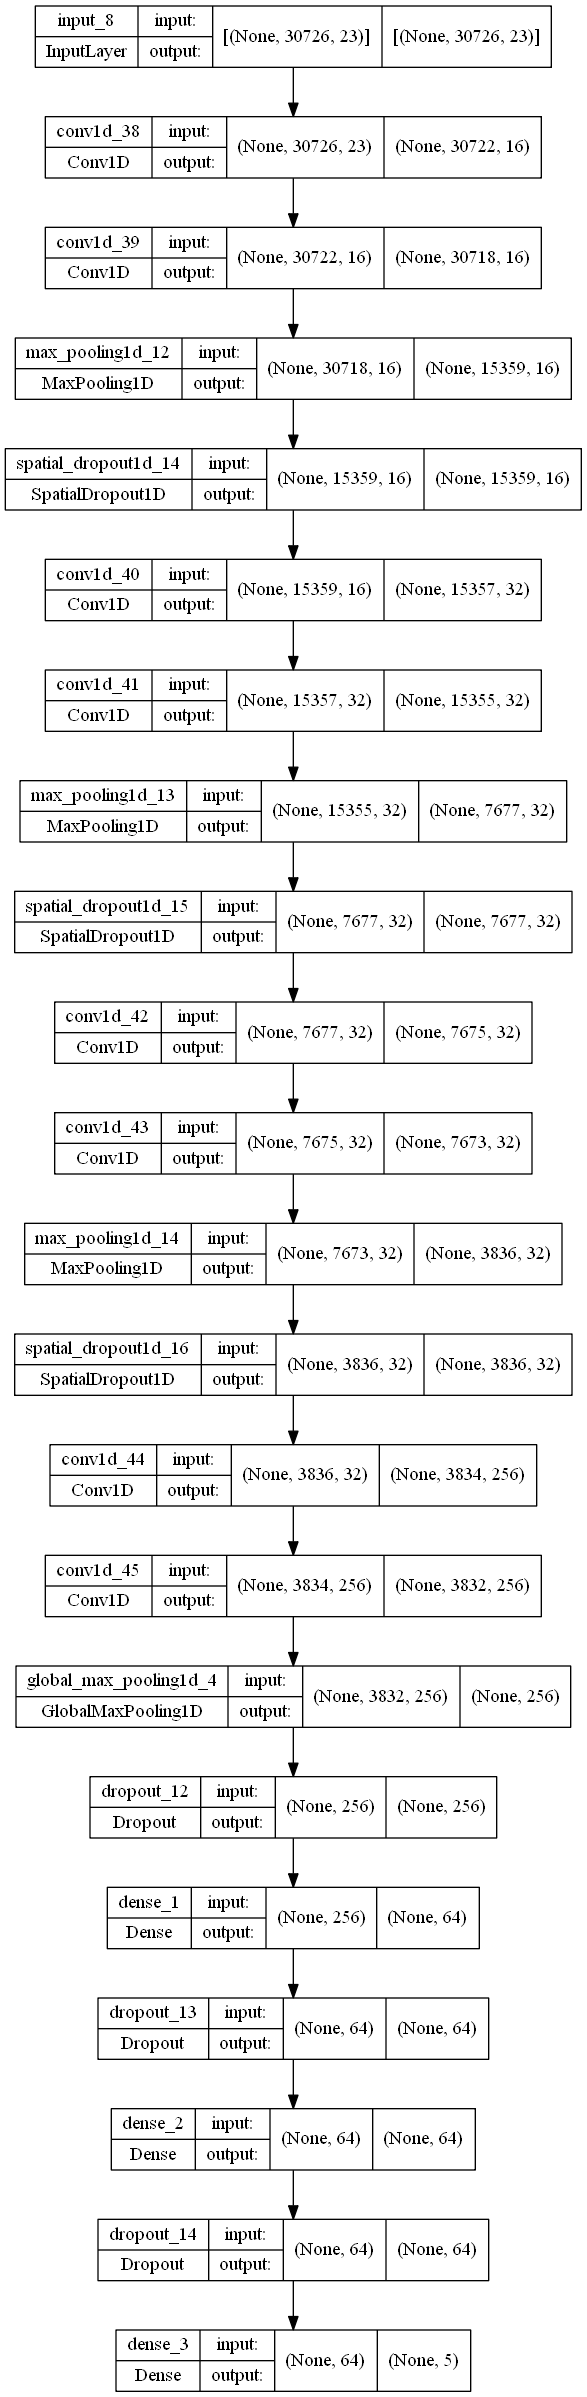

In [56]:
plot_model(MODEL_LIST[0], to_file="./images/" + NAME_LIST[0] + ".png", show_shapes=True, show_layer_names=True)

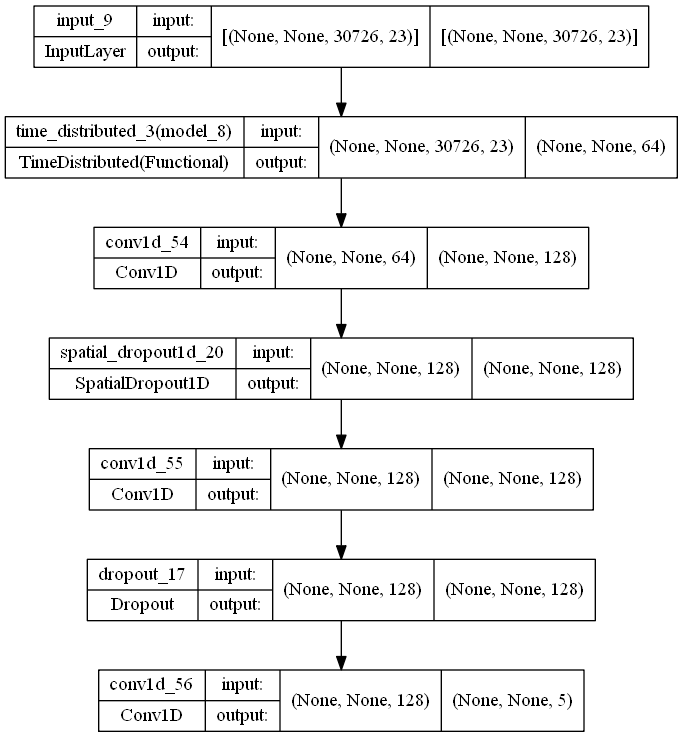

In [57]:
plot_model(MODEL_LIST[1], to_file="./images/" + NAME_LIST[1] + ".png", show_shapes=True, show_layer_names=True)

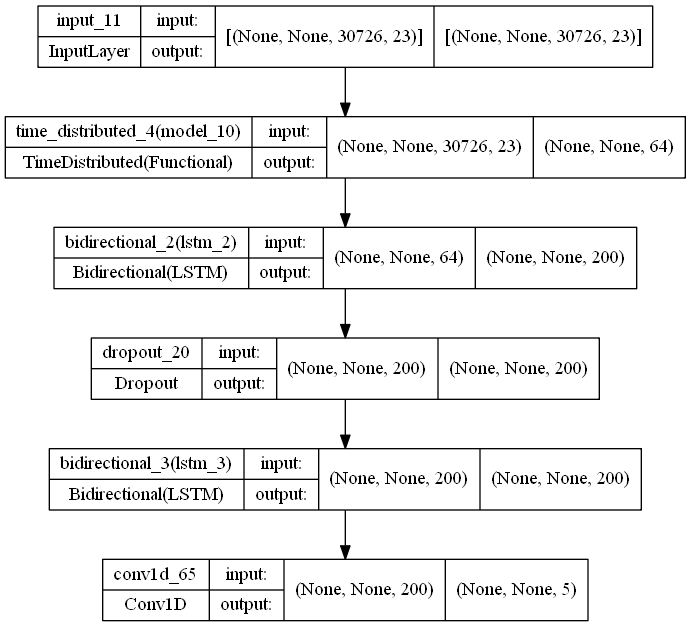

In [58]:
plot_model(MODEL_LIST[2], to_file="./images/" + NAME_LIST[2] + ".png", show_shapes=True, show_layer_names=True)

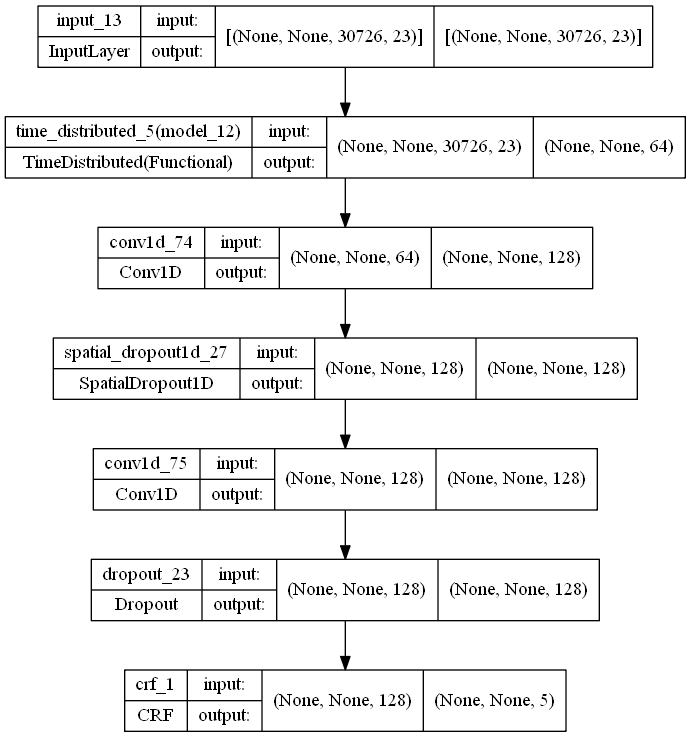

In [59]:
plot_model(MODEL_LIST[3], to_file="./images/" + NAME_LIST[3] + ".png", show_shapes=True, show_layer_names=True)

In [46]:
DISABLE_GPU = False
if DISABLE_GPU:
    os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

In [47]:
def get_callbacks(file_path, model_name):
    checkpoint = ModelCheckpoint(file_path, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
    early = EarlyStopping(monitor="val_acc", mode="max", patience=20, verbose=1)
    redonplat = ReduceLROnPlateau(monitor="val_acc", mode="max", patience=5, verbose=2)
    log_dir = "logs/" + str(model_name) + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tfboard = TensorBoard(log_dir=log_dir, histogram_freq=1)
    callbacks_list = [checkpoint, early, redonplat, tfboard]

In [54]:
def train_model(model, name):
    file_path = './models/' + name + "_" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S") + '.h5'
    callbacks_list = get_callbacks(file_path, name)
    opt = Adam(learning_rate=params.LEARNING_RATE)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    history = model.fit((x_train, y_train),
                    epochs=params.EPOCH_NUM,
                    batch_size=params.BATCH_SIZE,
                    validation_data=(x_test, y_test),
                    verbose=params.VERBOSE,
                    callbacks=callbacks_list)
    model = load_model(file_path)
    test_loss, test_acc = model.evaluate((x_test, y_test), steps=len(y_test), verbose=1)
    print('Loss: ', test_loss)
    print('Accuracy: ', test_acc) 
    return history, model

In [55]:
for i in range(len(MODEL_LIST)):
    history, trained_model = train_model(MODEL_LIST[i], NAME_LIST[i])
    HIST_LIST.append(history)
    TRAINED_MODEL.append(trained_model)

InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
def tr_plot(tr_data, start_epoch):
    #Plot the training and validation data
    tacc=tr_data.history['accuracy']
    tloss=tr_data.history['loss']
    vacc=tr_data.history['val_accuracy']
    vloss=tr_data.history['val_loss']
    Epoch_count=len(tacc)+ start_epoch
    Epochs=[]
    for i in range (start_epoch ,Epoch_count):
        Epochs.append(i+1)   
    index_loss=np.argmin(vloss)#  this is the epoch with the lowest validation loss
    val_lowest=vloss[index_loss]
    index_acc=np.argmax(vacc)
    acc_highest=vacc[index_acc]
    plt.style.use('fivethirtyeight')
    sc_label='best epoch= '+ str(index_loss+1 +start_epoch)
    vc_label='best epoch= '+ str(index_acc + 1+ start_epoch)
    fig,axes=plt.subplots(nrows=1, ncols=2, figsize=(20,8))
    axes[0].plot(Epochs,tloss, 'r', label='Training loss')
    axes[0].plot(Epochs,vloss,'g',label='Validation loss' )
    axes[0].scatter(index_loss+1 +start_epoch,val_lowest, s=150, c= 'blue', label=sc_label)
    axes[0].set_title('Training and Validation Loss')
    axes[0].set_xlabel('Epochs')
    axes[0].set_ylabel('Loss')
    axes[0].legend()
    axes[1].plot (Epochs,tacc,'r',label= 'Training Accuracy')
    axes[1].plot (Epochs,vacc,'g',label= 'Validation Accuracy')
    axes[1].scatter(index_acc+1 +start_epoch,acc_highest, s=150, c= 'blue', label=vc_label)
    axes[1].set_title('Training and Validation Accuracy')
    axes[1].set_xlabel('Epochs')
    axes[1].set_ylabel('Accuracy')
    axes[1].legend()
    plt.tight_layout    
    plt.show()

In [ ]:
def confusion_matrix_plot(matrix, classes, name):
    plt.figure(figsize=(12,10))
    cmap = "YlGnBu"
    ax= plt.subplot()
    sns.heatmap(matrix, annot=True, fmt='g', ax=ax, cmap=cmap);  #annot=True to annotate cells, ftm='g' to disable scientific notation
    plt.savefig('./images/' + name + 'con_mat.png')
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');
    ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(classes); 
    ax.yaxis.set_ticklabels(classes[::-1]);
    plt.show()

In [ ]:
def cal_score(model, name, plot=True, labels=[0, 1, 2, 3, 4]):
    matrix = confusion_matrix(predictions, labels)
    print(matrix)
    print('\n')

    f1 = f1_score(predictions, labels, average='weighted')
    print(f'F1 Score: {f1}')
    print('\n')
    
    print(classification_report(predictions, labels, target_names=classes))
    
    if plot:
        confusion_matrix_plot(matrix, labels, name)

In [ ]:
def plot_and_f1(model, history, name):
    cal_score(model, name, plot=True)
    tr_plot(history, 0)
    print("==" * 80)

In [ ]:
for i in range(len(HIST_LIST)):
    plot_and_f1(TRAINED_MODEL[i], HIST_LIST[i], NAME_LIST[i])